In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp

Tratamento dos dados

In [2]:
df = pd.read_csv('NBA Stats 202324 All Stats  NBA Player Props Tool (4).csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [148]:
df.head()

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,1,Joel Embiid,Phi,C,30.2,6,41.4,35.7,15.8,78,...,5.7,1.2,1.5,4.2,43.8,38.7,49.5,12.2,117.1,108.0
1,2,Jalen Brunson,Nyk,G,27.8,13,39.8,36.4,9.3,120,...,7.5,0.8,0.2,2.7,35.7,39.8,43.2,9.3,114.8,114.7
2,3,Damian Lillard,Mil,G,33.9,4,39.1,31.4,10.0,38,...,5.0,1.0,0.0,2.3,34.5,36.3,39.5,8.2,127.6,115.7
3,4,Shai Gilgeous-Alexander,Okc,G,25.9,10,39.9,32.3,8.9,81,...,6.4,1.3,1.7,2.2,37.4,36.6,43.8,11.2,118.3,106.9
4,5,Tyrese Maxey,Phi,G,23.6,6,44.6,28.1,8.6,28,...,6.8,0.8,0.3,2.2,35.0,36.7,41.8,9.1,120.9,113.3


TOP 5 Players with most points


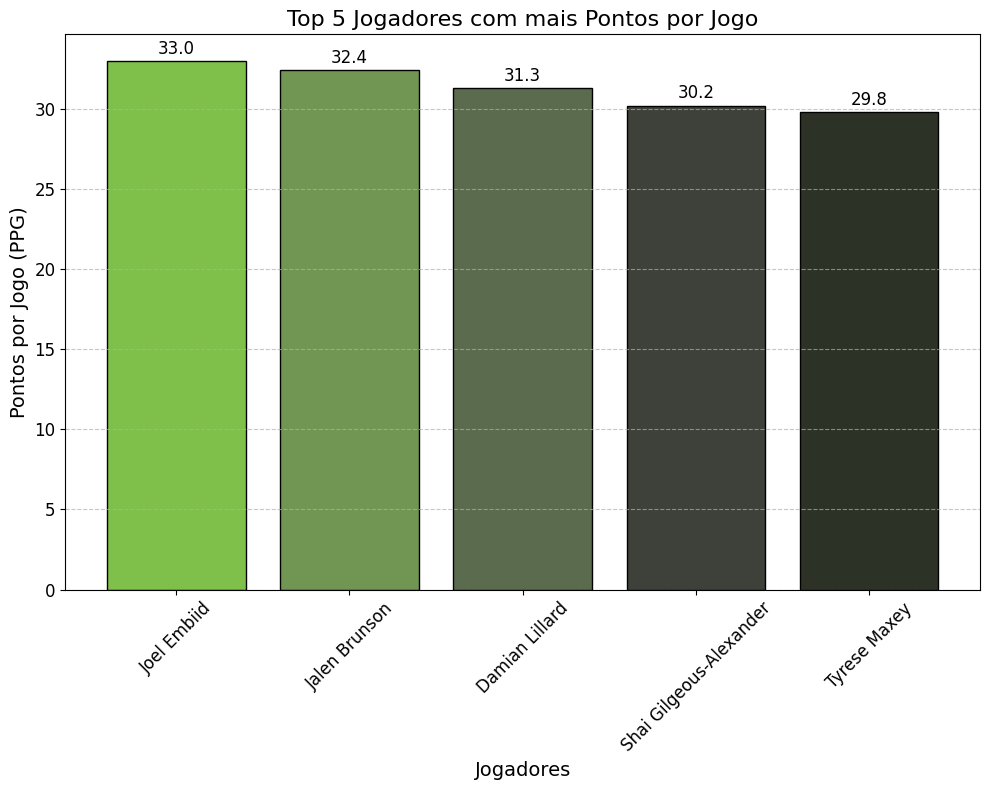

In [78]:
top_5_ppg = df.nlargest(5, 'PPG')
Top5Points = top_5_ppg['PPG'].values
names = top_5_ppg['NAME'].values
colors = ['#7FC04A', '#719653', '#5B6B4D', '#3D4139', '#2C3326']

plt.figure(figsize=(10,8))
bars = plt.bar(names, Top5Points, color=colors, edgecolor='black')

plt.xlabel('Jogadores', fontsize=14)
plt.ylabel('Pontos por Jogo (PPG)', fontsize=14)
plt.title('Top 5 Jogadores com mais Pontos por Jogo', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, round(yval, 1), ha='center', va='bottom', fontsize=12, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Pontos por jogo de cada time

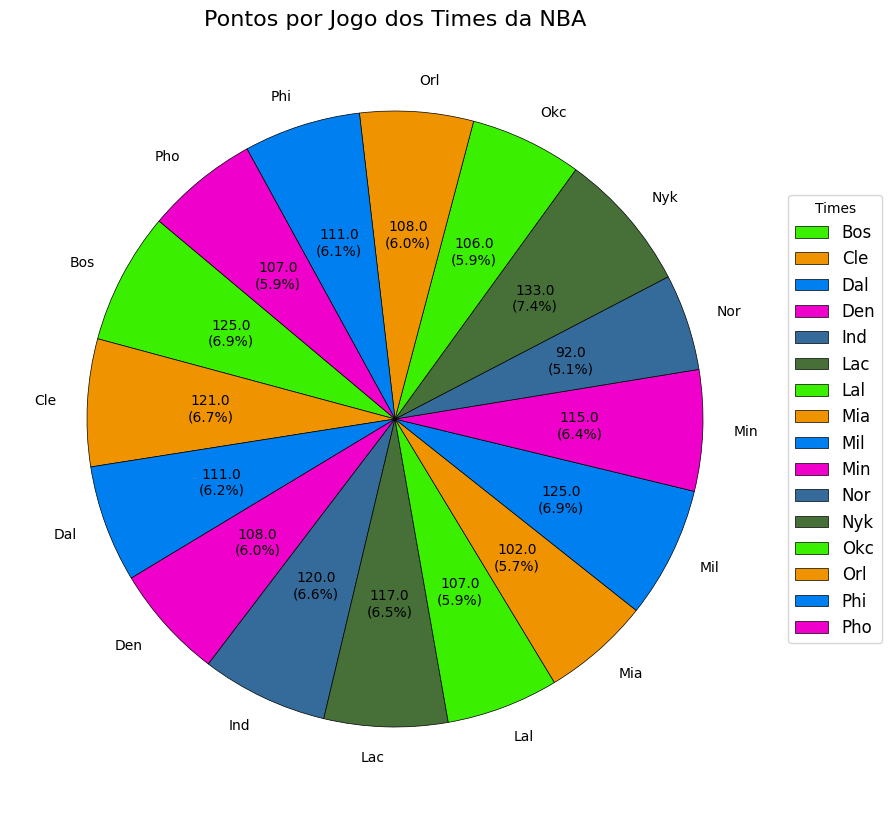

In [150]:
team_points = df.groupby('TEAM')['PPG'].sum().reset_index()
team_points = team_points.rename(columns={'PPG': 'Total Points'})
total_points = team_points['Total Points'].values



colors = ['#3AF000', '#F09300', '#0080F0', '#F000CB','#346B9B','#467038']

def format_label(pct):
    absolute_value = float(round(pct/100.*team_points['Total Points'].sum(), 0))
    return f'{absolute_value}\n({pct:.1f}%)'

# Criar o gráfico de pizza
plt.figure(figsize=(10, 10))  # Ajustar o tamanho do gráfico
plt.pie(total_points, labels=team_points['TEAM'].values, startangle=140, colors=colors,autopct=format_label,wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'})

plt.title('Pontos por jogos dos Times da NBA', fontsize=16)
plt.legend(title="Times", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

plt.show()

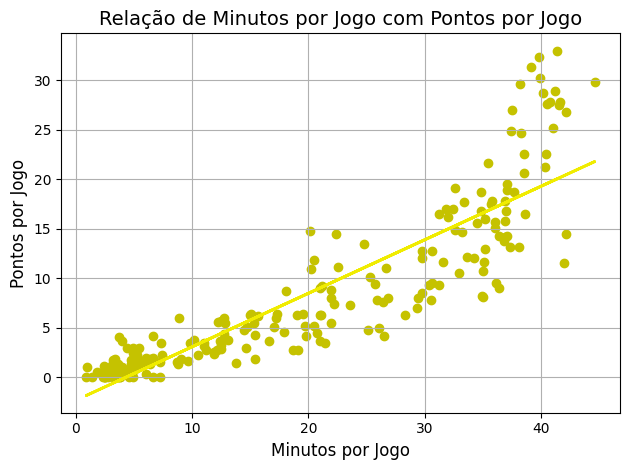

In [174]:
df.columns
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(df['MPG'], df['PPG'])

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, df['MPG']))

plt.scatter(df['MPG'], df['PPG'], color='#C5C200', marker='o', linewidth=1, label='Pontos por Jogo')
plt.plot(df['MPG'], mymodel, color='#F0EC00', linewidth=2, label='Regressão Linear')

plt.title('Relação de Minutos por Jogo com Pontos por Jogo', fontsize=14)
plt.xlabel('Minutos por Jogo', fontsize=12)
plt.ylabel('Pontos por Jogo', fontsize=12)
plt.grid(True)


plt.tight_layout()
plt.show()